In [5]:
from solver import Solver
from model import Net
from dataset import RotationDataset
from torch.utils.data import DataLoader
import torch
import numpy as np
from coordinate_transformation import euclidean_to_spherical, spherical_to_euclidean
import math
import time
import lossfn
from experiment import run_experiment
import matplotlib.pyplot as plt

In [6]:
SEED_TEST = 0

In [7]:
n_train = 100
train_seed = 1683
dim = 2

In [8]:
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}, 
           {'loss_fn': lossfn.get_norm_loss(), 'weight': 1, 'label': 'norm'}]
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp/')

Model save: tmp/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.8806303143501282
Model save: tmp/best.pkl
Epoch 200	Iteration 200
Train score = 0.2862741947174072	Test score = 0.49229851365089417
Model save: tmp/best.pkl
Epoch 400	Iteration 400
Train score = 0.09724364429712296	Test score = 0.16788576543331146
Model save: tmp/best.pkl
Epoch 600	Iteration 600
Train score = 0.05101611837744713	Test score = 0.08909951150417328
Model save: tmp/best.pkl
Epoch 800	Iteration 800
Train score = 0.025626428425312042	Test score = 0.048144951462745667
Model save: tmp/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.011191854253411293	Test score = 0.02272847667336464
Model save: tmp/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.006602104753255844	Test score = 0.013621971942484379
Model save: tmp/best.pkl
Epoch 1400	Iteration 1400
Train score = 0.005427770782262087	Test score = 0.010889923200011253
Model save: tmp/best.pkl
Epoch 1600	Iteration 1600
Train score = 0.0048095863312

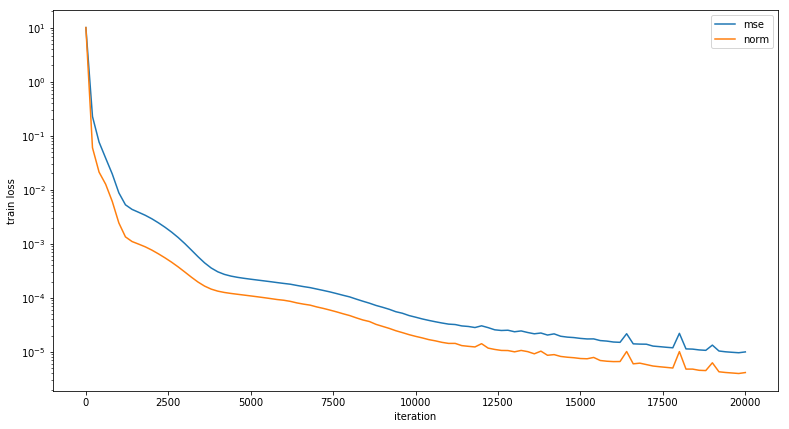

In [9]:
plt.figure(figsize=(13,7))
path = 'tmp/final.pkl'.format(0.5, 2, 10, 1683)
# Plot train loss
model = Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2))))
solver = Solver(model)
solver.load_checkpoint(path)
for key in solver.hist["individual_train_losses"]:
    plt.plot(solver.hist["iterations"], solver.hist["individual_train_losses"][key], label=key)
plt.legend()
plt.yscale('log')
plt.ylabel("train loss")
plt.xlabel("iteration")
plt.show()

In [ ]:
##### def get_test_loader(dim, n_test=256):
    test_data = RotationDataset(dim, n_test, seed=SEED_TEST)
    return DataLoader(test_data)

In [4]:
"""
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='KoBstrtr', api_key='weMO837juuptFvlGjnXg')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p1 = []
p2 = []
p3 = []
for a_, b, c in get_test_loader(3, 1024):
    for a in a_:
        p1.append(a[0].item())
        p2.append(a[1].item())
        p3.append(a[2].item())
ax.scatter(p1, p2, p3, s=0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

x2, y2, z2 = p1, p2, p3
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=1,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')"""
_ = 1

In [5]:
starttime = time.time()
dim = 2
n_train = 7
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_2_ntrain_7/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.074445366859436
Epoch 200	Iteration 200
Train score = 0.08153009414672852	Test score = 1.7742191553115845
Epoch 400	Iteration 400
Train score = 0.05204985663294792	Test score = 1.8678776025772095
Epoch 600	Iteration 600
Train score = 0.023094739764928818	Test score = 2.282210111618042
Epoch 800	Iteration 800
Train score = 0.007979564368724823	Test score = 2.811469078063965
Epoch 1000	Iteration 1000
Train score = 0.0037086973898112774	Test score = 2.944113254547119
Epoch 1200	Iteration 1200
Train score = 0.002741479082033038	Test score = 2.8487722873687744
Epoch 1400	Iteration 1400
Train score = 0.002382575999945402	Test score = 2.7228405475616455
Epoch 1600	Iteration 1600
Train score = 0.002161750802770257	Test score = 2.5999250411987305
Epoch 1800	Iteration 1800
Train score = 0.001995250815525651	Test score = 2.481663227081299
Epoch 2000	Iteration 2000
Train score = 0.00185521028470247

In [6]:
starttime = time.time()
dim = 2
n_train = 10
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_2_ntrain_10/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.282441258430481
Model save: checkpoint_dim_2_ntrain_10/best.pkl
Epoch 200	Iteration 200
Train score = 0.18040354549884796	Test score = 0.6242641806602478
Model save: checkpoint_dim_2_ntrain_10/best.pkl
Epoch 400	Iteration 400
Train score = 0.058795265853405	Test score = 0.29942336678504944
Model save: checkpoint_dim_2_ntrain_10/best.pkl
Epoch 600	Iteration 600
Train score = 0.013659616000950336	Test score = 0.2040022760629654
Model save: checkpoint_dim_2_ntrain_10/best.pkl
Epoch 800	Iteration 800
Train score = 0.006954097654670477	Test score = 0.20207883417606354
Epoch 1000	Iteration 1000
Train score = 0.003892452223226428	Test score = 0.20900706946849823
Epoch 1200	Iteration 1200
Train score = 0.0020116495434194803	Test score = 0.21803520619869232
Epoch 1400	Iteration 1400
Train score = 0.0009952865075320005	Test score = 0.22688843309879303
Epoch 1600	Iteration 1600
Train score = 0.00

In [7]:
starttime = time.time()
dim = 2
n_train = 20
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_2_ntrain_20/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.1690473556518555
Model save: checkpoint_dim_2_ntrain_20/best.pkl
Epoch 200	Iteration 200
Train score = 0.16534961760044098	Test score = 0.46200716495513916
Model save: checkpoint_dim_2_ntrain_20/best.pkl
Epoch 400	Iteration 400
Train score = 0.05251223221421242	Test score = 0.2328738570213318
Model save: checkpoint_dim_2_ntrain_20/best.pkl
Epoch 600	Iteration 600
Train score = 0.02756497636437416	Test score = 0.1645687371492386
Model save: checkpoint_dim_2_ntrain_20/best.pkl
Epoch 800	Iteration 800
Train score = 0.021672561764717102	Test score = 0.1401883065700531
Model save: checkpoint_dim_2_ntrain_20/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.016712142154574394	Test score = 0.11517170071601868
Model save: checkpoint_dim_2_ntrain_20/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.012018703855574131	Test score = 0.08801863342523575
Model save: checkpoint_dim_2_ntrain_20/best

In [8]:
starttime = time.time()
dim = 2
n_train = 30
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_2_ntrain_30/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.2531064748764038
Model save: checkpoint_dim_2_ntrain_30/best.pkl
Epoch 200	Iteration 200
Train score = 0.22767354547977448	Test score = 0.6076385974884033
Model save: checkpoint_dim_2_ntrain_30/best.pkl
Epoch 400	Iteration 400
Train score = 0.09497056901454926	Test score = 0.3005104064941406
Model save: checkpoint_dim_2_ntrain_30/best.pkl
Epoch 600	Iteration 600
Train score = 0.03921423479914665	Test score = 0.15569806098937988
Model save: checkpoint_dim_2_ntrain_30/best.pkl
Epoch 800	Iteration 800
Train score = 0.02752956561744213	Test score = 0.1196155697107315
Model save: checkpoint_dim_2_ntrain_30/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.019553087651729584	Test score = 0.08994132280349731
Model save: checkpoint_dim_2_ntrain_30/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.012815193273127079	Test score = 0.06287802010774612
Model save: checkpoint_dim_2_ntrain_30/best.

In [9]:
starttime = time.time()
dim = 2
n_train = 40
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_2_ntrain_40/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.202714204788208
Model save: checkpoint_dim_2_ntrain_40/best.pkl
Epoch 200	Iteration 200
Train score = 0.16479142010211945	Test score = 0.41736531257629395
Model save: checkpoint_dim_2_ntrain_40/best.pkl
Epoch 400	Iteration 400
Train score = 0.05408252030611038	Test score = 0.17834380269050598
Model save: checkpoint_dim_2_ntrain_40/best.pkl
Epoch 600	Iteration 600
Train score = 0.03972440958023071	Test score = 0.13806873559951782
Model save: checkpoint_dim_2_ntrain_40/best.pkl
Epoch 800	Iteration 800
Train score = 0.03036639466881752	Test score = 0.10694003105163574
Model save: checkpoint_dim_2_ntrain_40/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.020339248701930046	Test score = 0.07309446483850479
Model save: checkpoint_dim_2_ntrain_40/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.012667253613471985	Test score = 0.047569334506988525
Model save: checkpoint_dim_2_ntrain_40/be

In [10]:
starttime = time.time()
dim = 3
n_train = 30
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_3_ntrain_30/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.1226670742034912
Model save: checkpoint_dim_3_ntrain_30/best.pkl
Epoch 200	Iteration 200
Train score = 0.14942967891693115	Test score = 1.0097514390945435
Model save: checkpoint_dim_3_ntrain_30/best.pkl
Epoch 400	Iteration 400
Train score = 0.08107175678014755	Test score = 0.848283588886261
Model save: checkpoint_dim_3_ntrain_30/best.pkl
Epoch 600	Iteration 600
Train score = 0.030667435377836227	Test score = 0.6474646329879761
Model save: checkpoint_dim_3_ntrain_30/best.pkl
Epoch 800	Iteration 800
Train score = 0.0143599146977067	Test score = 0.5866938829421997
Model save: checkpoint_dim_3_ntrain_30/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.008321749046444893	Test score = 0.5650683045387268
Model save: checkpoint_dim_3_ntrain_30/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.005346402060240507	Test score = 0.5617467761039734
Model save: checkpoint_dim_3_ntrain_30/best.pkl


In [11]:
starttime = time.time()
dim = 3
n_train = 50
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_3_ntrain_50/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.2687479257583618
Model save: checkpoint_dim_3_ntrain_50/best.pkl
Epoch 200	Iteration 200
Train score = 0.18040503561496735	Test score = 0.9191245436668396
Model save: checkpoint_dim_3_ntrain_50/best.pkl
Epoch 400	Iteration 400
Train score = 0.12318207323551178	Test score = 0.7866529226303101
Model save: checkpoint_dim_3_ntrain_50/best.pkl
Epoch 600	Iteration 600
Train score = 0.06967687606811523	Test score = 0.6340273022651672
Model save: checkpoint_dim_3_ntrain_50/best.pkl
Epoch 800	Iteration 800
Train score = 0.03656366094946861	Test score = 0.5109978914260864
Model save: checkpoint_dim_3_ntrain_50/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.019705548882484436	Test score = 0.41420814394950867
Model save: checkpoint_dim_3_ntrain_50/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.012407931499183178	Test score = 0.37362921237945557
Model save: checkpoint_dim_3_ntrain_50/best.p

In [12]:
starttime = time.time()
dim = 3
n_train = 100
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_3_ntrain_100/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.2695528268814087
Model save: checkpoint_dim_3_ntrain_100/best.pkl
Epoch 200	Iteration 200
Train score = 0.20253637433052063	Test score = 0.7699488401412964
Model save: checkpoint_dim_3_ntrain_100/best.pkl
Epoch 400	Iteration 400
Train score = 0.1151590570807457	Test score = 0.46988096833229065
Model save: checkpoint_dim_3_ntrain_100/best.pkl
Epoch 600	Iteration 600
Train score = 0.05891592055559158	Test score = 0.2862328886985779
Model save: checkpoint_dim_3_ntrain_100/best.pkl
Epoch 800	Iteration 800
Train score = 0.033722709864377975	Test score = 0.20337720215320587
Model save: checkpoint_dim_3_ntrain_100/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.019633086398243904	Test score = 0.15548357367515564
Model save: checkpoint_dim_3_ntrain_100/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.01236611045897007	Test score = 0.12335041910409927
Model save: checkpoint_dim_3_ntrain_1

In [13]:
starttime = time.time()
dim = 3
n_train = 200
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_3_ntrain_200/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.2360090017318726
Model save: checkpoint_dim_3_ntrain_200/best.pkl
Epoch 200	Iteration 200
Train score = 0.2117166817188263	Test score = 0.7370295524597168
Model save: checkpoint_dim_3_ntrain_200/best.pkl
Epoch 400	Iteration 400
Train score = 0.10959678143262863	Test score = 0.4018394351005554
Model save: checkpoint_dim_3_ntrain_200/best.pkl
Epoch 600	Iteration 600
Train score = 0.044247448444366455	Test score = 0.19580653309822083
Model save: checkpoint_dim_3_ntrain_200/best.pkl
Epoch 800	Iteration 800
Train score = 0.025293396785855293	Test score = 0.13481512665748596
Model save: checkpoint_dim_3_ntrain_200/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.014718626625835896	Test score = 0.0917576476931572
Model save: checkpoint_dim_3_ntrain_200/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.00881955586373806	Test score = 0.061558667570352554
Model save: checkpoint_dim_3_ntrain_

In [14]:
starttime = time.time()
dim = 5
n_train = 200
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_5_ntrain_200/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.234283685684204
Model save: checkpoint_dim_5_ntrain_200/best.pkl
Epoch 200	Iteration 200
Train score = 0.11386033147573471	Test score = 0.8786684274673462
Model save: checkpoint_dim_5_ntrain_200/best.pkl
Epoch 400	Iteration 400
Train score = 0.044764358550310135	Test score = 0.7061237096786499
Epoch 600	Iteration 600
Train score = 0.014823914505541325	Test score = 0.7688612341880798
Epoch 800	Iteration 800
Train score = 0.003899616887792945	Test score = 0.8726743459701538
Epoch 1000	Iteration 1000
Train score = 0.0008720752666704357	Test score = 0.966403603553772
Epoch 1200	Iteration 1200
Train score = 0.00018041953444480896	Test score = 1.0209330320358276
Epoch 1400	Iteration 1400
Train score = 4.15821086789947e-05	Test score = 1.0427578687667847
Epoch 1600	Iteration 1600
Train score = 1.4752445167687256e-05	Test score = 1.0502570867538452
Epoch 1800	Iteration 1800
Train score = 5.46

In [15]:
starttime = time.time()
dim = 5
n_train = 500
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_5_ntrain_500/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.232175350189209
Model save: checkpoint_dim_5_ntrain_500/best.pkl
Epoch 200	Iteration 200
Train score = 0.11472657322883606	Test score = 0.7627168297767639
Model save: checkpoint_dim_5_ntrain_500/best.pkl
Epoch 400	Iteration 400
Train score = 0.062137726694345474	Test score = 0.5122194886207581
Model save: checkpoint_dim_5_ntrain_500/best.pkl
Epoch 600	Iteration 600
Train score = 0.02711312845349312	Test score = 0.39259088039398193
Model save: checkpoint_dim_5_ntrain_500/best.pkl
Epoch 800	Iteration 800
Train score = 0.01162236649543047	Test score = 0.29672977328300476
Model save: checkpoint_dim_5_ntrain_500/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.005132246296852827	Test score = 0.23746012151241302
Model save: checkpoint_dim_5_ntrain_500/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.0024569297675043344	Test score = 0.20866233110427856
Model save: checkpoint_dim_5_ntrain

In [16]:
starttime = time.time()
dim = 5
n_train = 1000
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_5_ntrain_1000/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.3824199438095093
Model save: checkpoint_dim_5_ntrain_1000/best.pkl
Epoch 100	Iteration 200
Train score = 0.1411757618188858	Test score = 0.8094899654388428
Model save: checkpoint_dim_5_ntrain_1000/best.pkl
Epoch 200	Iteration 400
Train score = 0.11385007202625275	Test score = 0.6382827162742615
Model save: checkpoint_dim_5_ntrain_1000/best.pkl
Epoch 300	Iteration 600
Train score = 0.07714470475912094	Test score = 0.470055490732193
Model save: checkpoint_dim_5_ntrain_1000/best.pkl
Epoch 400	Iteration 800
Train score = 0.05498110502958298	Test score = 0.3637937903404236
Model save: checkpoint_dim_5_ntrain_1000/best.pkl
Epoch 500	Iteration 1000
Train score = 0.03789500892162323	Test score = 0.27845850586891174
Model save: checkpoint_dim_5_ntrain_1000/best.pkl
Epoch 600	Iteration 1200
Train score = 0.028188299387693405	Test score = 0.22390064597129822
Model save: checkpoint_dim_5_ntrain_

In [17]:
starttime = time.time()
dim = 10
n_train = 5000
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_10_ntrain_5000/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.8218889236450195
Model save: checkpoint_dim_10_ntrain_5000/best.pkl
Epoch 20	Iteration 200
Train score = 0.06777556985616684	Test score = 0.7048346996307373
Model save: checkpoint_dim_10_ntrain_5000/best.pkl
Epoch 40	Iteration 400
Train score = 0.06326689571142197	Test score = 0.668420135974884
Model save: checkpoint_dim_10_ntrain_5000/best.pkl
Epoch 60	Iteration 600
Train score = 0.05002986267209053	Test score = 0.5351202487945557
Model save: checkpoint_dim_10_ntrain_5000/best.pkl
Epoch 80	Iteration 800
Train score = 0.04562299698591232	Test score = 0.4875216484069824
Model save: checkpoint_dim_10_ntrain_5000/best.pkl
Epoch 100	Iteration 1000
Train score = 0.04309452325105667	Test score = 0.4606740474700928
Model save: checkpoint_dim_10_ntrain_5000/best.pkl
Epoch 120	Iteration 1200
Train score = 0.0412803515791893	Test score = 0.44784367084503174
Model save: checkpoint_dim_10_ntrai

In [18]:
starttime = time.time()
dim = 10
n_train = 10000
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_10_ntrain_10000/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.665892481803894
Model save: checkpoint_dim_10_ntrain_10000/best.pkl
Epoch 10	Iteration 200
Train score = 0.06881246715784073	Test score = 0.7028036713600159
Model save: checkpoint_dim_10_ntrain_10000/best.pkl
Epoch 20	Iteration 400
Train score = 0.06496746838092804	Test score = 0.6707662343978882
Model save: checkpoint_dim_10_ntrain_10000/best.pkl
Epoch 30	Iteration 600
Train score = 0.051691967993974686	Test score = 0.5305749177932739
Model save: checkpoint_dim_10_ntrain_10000/best.pkl
Epoch 40	Iteration 800
Train score = 0.04625362902879715	Test score = 0.4752458930015564
Model save: checkpoint_dim_10_ntrain_10000/best.pkl
Epoch 50	Iteration 1000
Train score = 0.0444326214492321	Test score = 0.456555038690567
Model save: checkpoint_dim_10_ntrain_10000/best.pkl
Epoch 60	Iteration 1200
Train score = 0.04346098750829697	Test score = 0.44800812005996704
Model save: checkpoint_dim_10_

In [19]:
starttime = time.time()
dim = 10
n_train = 20000
data = RotationDataset(dim, n_train)
loader = DataLoader(data, batch_size=512, shuffle=True)
solver = Solver(Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2)))), 
                loss_fn_train=[{'loss_fn': lossfn.get_mse_loss(), 'weight': 1}],
                checkpoint_dir='checkpoint_dim_{}_ntrain_{}/'.format(dim, n_train))
solver.train(loader, iterations=10000, test_every_iterations=200, test_loader=get_test_loader(dim))
print("Time: {}".format(time.time() - starttime))

Model save: checkpoint_dim_10_ntrain_20000/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.7656681537628174
Model save: checkpoint_dim_10_ntrain_20000/best.pkl
Epoch 5	Iteration 200
Train score = 0.06986171007156372	Test score = 0.7084119319915771
Model save: checkpoint_dim_10_ntrain_20000/best.pkl
Epoch 10	Iteration 400
Train score = 0.06589004397392273	Test score = 0.6759792566299438
Model save: checkpoint_dim_10_ntrain_20000/best.pkl
Epoch 15	Iteration 600
Train score = 0.058321572840213776	Test score = 0.5824564695358276
Model save: checkpoint_dim_10_ntrain_20000/best.pkl
Epoch 20	Iteration 800
Train score = 0.05023233965039253	Test score = 0.5146977305412292
Model save: checkpoint_dim_10_ntrain_20000/best.pkl
Epoch 25	Iteration 1000
Train score = 0.045827724039554596	Test score = 0.470084547996521
Model save: checkpoint_dim_10_ntrain_20000/best.pkl
Epoch 30	Iteration 1200
Train score = 0.04425767809152603	Test score = 0.45201584696769714
Model save: checkpoint_dim_1